In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
# format

# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl

# others
dpi=900

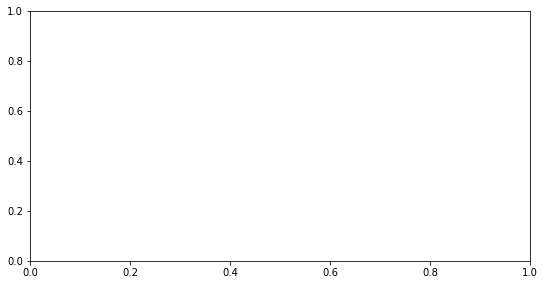

In [3]:
length = 0.1405*pl*3.5
width = pw*0.333*3.5
fig = plt.figure(constrained_layout=False, figsize=(width,length))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                        wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax1_ratio = 0.5

# fig0 parameters
## light and neuron display
cortex_boundaries = { 
    'x': [0,4000],
    'z': [0,2000]
}
L1_x = 2000
L2_x = 2000
# change neuron parameters in the notebooks generate_LXX_collection.ipynb
# light source parameters:
parameters = dict(
    lightsource1 = dict(
        NA = 0.22,
        d__um = 200),
    lightsource2 = dict(
        NA = 0.39,
        d__um = 400),
    mu_s__per_mm = 7.37,
    mu_a__per_mm = 0.1249,
)
    
# light profiles
# Foutz optical fiber light source
from neurostim.light_propagation_models import foutz_et_al2012
xx, zz = np.meshgrid(np.arange(cortex_boundaries['x'][0],cortex_boundaries['x'][1]),
                     np.arange(cortex_boundaries['z'][0],cortex_boundaries['z'][1]))
L1_prof = foutz_et_al2012(
    x=xx-L1_x, y=np.zeros(np.shape(xx)), z=zz, power=1, 
    width=parameters['lightsource1']['d__um'], NA=parameters['lightsource1']['NA'], 
    scatter_coefficient=parameters['mu_s__per_mm'], absorbance_coefficient=parameters['mu_a__per_mm'],
    spreading=True, scattering=True)

# for LogNorm set all 0 to 1e-10
L1_prof[L1_prof==0] = 1e-10

# normalize light_profile by average output intensity
# 1W/cm2 light power / (pi * diam_in_cm/2)**2
avrg_output_intensity = 1 / (np.pi * (parameters['lightsource1']['d__um']/2 * 1e-4)**2)
L1_prof /= avrg_output_intensity

# display 500 um bar for scale
L1_prof[1300:1800,3770:3800]=np.max(L1_prof)
L1_prof[1770:1800,3300:3800]=np.max(L1_prof)
                                    
# add cortical layer boundaries
cortical_layer_boundaries = [0, 150, 630, 950, 1200, 1520]
for bound in cortical_layer_boundaries:
    L1_prof[bound:bound+1,:] = np.max(L1_prof)

In [4]:
from matplotlib.colors import LogNorm, BoundaryNorm
from matplotlib.cm import Blues as cmap
bounds_cmap = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
mappable = ax1.pcolormesh(xx,zz*-1,L1_prof, shading='nearest', cmap=cmap,
              #norm=LogNorm(vmin=6300e-4,vmax=63000)
              norm=BoundaryNorm(bounds_cmap,ncolors=cmap.N,extend='both')
)
              
ax1.set_xlim(*cortex_boundaries['x']) 
ax1.set_ylim(
    -1*(cortex_boundaries['x'][1]-cortex_boundaries['x'][0])*ax1_ratio,
    0
)
# turn axes off for neuron and light display
ax1.set_axis_off()
# print scale
#ax1.plot([500,600,600],[500,500,600], lw=10, color='red')

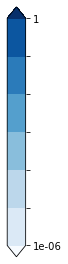

In [5]:
fig.savefig('plots/cortex_light.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')

cfig, cax= plt.subplots(figsize=(pw/20,length))
plt.colorbar(mappable, cax=cax, ticks=bounds_cmap)
cax.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))
cfig.savefig('plots/light_cbar.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')
plt.show()